## Naive Bayes Theorm

**concept:** Naive Bayes is a classification algorithm based on Bayes'Theorm with 'naive' assumption: it assumes that the presence of a particular features in a class is independent of the presence of any other feature. while this assumption is rarely true in rea;-world data, it often performs surprisingly well, especially for text classification.

* **Goal:** classification.

* **How it works:** It calculates the probability of an event given prior knowledge, making the 'naive' assumption of feature independence. 

**To Master Easier:** Imagine you're tying to figure out if an email is spam. if it contain words like 'viagra,', 'lottary,' and 'free,' Naive Bayes assumes these words contribute independently to the "spam" probability, even if they often appear together.

**Real time uses cases:**

* **Spam Filtering:** Highly effective for classifying spam emails.

* **Sentiment Analysis:** Determining the sentiment of a piece of text (positive, negative, neutral).

* **Document Classification:** Categorizing news articles, reviews, etc.

* **Medical Diagnosis:** Predicting the likelihood of a disease given symptoms.

#### Naive Bayes Theorm (code Example)

**Dataset:** A synthetic dataset suitable for demonstrating Naive Bayes, like the make_classification dataset.

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print('--- Naive Bayes Theorm (GuassianNB) ---')

--- Naive Bayes Theorm (GuassianNB) ---


In [7]:
# 1. Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
                           n_classes=2, random_state=42)

print(f'X shape: {X.shape}, y shape: {y.shape}')
print(f'\nX sample: {X[:5]}, \n y sample: {y[:5]}')

X shape: (1000, 10), y shape: (1000,)

X sample: [[ 1.12510039  1.17812384  0.49351604  0.79087988 -0.61427777  1.34701995
   1.41951509  1.35732466  0.9660408  -1.98113862]
 [-0.56464086  3.6386291  -1.52241469 -1.54170477  1.6166972   4.78131011
   3.19029219 -0.89025442  1.43882638 -3.82874758]
 [ 0.51631285  2.16542633 -0.62848571 -0.3869229   0.49251774  1.44238083
   1.33290457 -1.95817543 -0.34880315 -1.8041241 ]
 [ 0.53728173  0.96661781 -0.1154203   0.67075498 -0.9585158   0.87143961
   0.50818563 -1.03447136 -1.65417644 -1.91050261]
 [ 0.27838451  1.06582796 -1.7249169  -2.23566655  0.7151073   0.73124852
  -0.67411885  0.59833017 -0.52428274  1.04760996]], 
 y sample: [1 0 0 1 0]


In [10]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
print(f'\n X_train_sample: {X_train[:5]}, \n y_train_sample: {y_train[:5]}')


 X_train_sample: [[ 1.51677926  1.57641847 -0.0402529  -0.06987154 -0.88235376  0.6291115
   0.13859616  0.66941619  0.98138399 -1.15411796]
 [ 0.983032    1.19068754  1.1230532   1.03042754 -1.35155444 -0.10526918
   0.01709405 -0.14484088  1.31563186 -1.87441516]
 [ 2.5260578  -0.39371497 -1.73464034 -3.27704437 -1.51773168 -0.81000609
  -3.94359288  0.4886131  -0.5129346   4.32130695]
 [-2.04089502  0.52515581  0.66962263  3.57884932 -2.04262878  2.17092543
   2.0209118  -1.4561121  -0.31861624 -6.3954088 ]
 [-0.20369688 -0.04219849 -1.24217907 -1.1899453  -0.06309316  1.36601421
  -0.30621357 -1.13644994  0.59707256  0.29387647]], 
 y_train_sample: [1 1 1 1 0]


In [11]:
# 2. Train the Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [13]:
# 3. Make predictions on the test set
y_pred_nb = model_nb.predict(X_test)
y_prob_nb = model_nb.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
print(f'\n y_pred_nb: {y_pred_nb[:5]}')
print(f'\n y_prob_nb: {y_prob_nb[:5]}')


 y_pred_nb: [0 1 1 1 0]

 y_prob_nb: [0.20480585 0.7646432  1.         0.95260559 0.18936735]


In [14]:
# 4. Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f'\nAccuracy: {accuracy_nb:.2f}')
print(f'\nConfusion Matrix:\n{conf_matrix_nb}')
print(f'\nClassification Report:\n{class_report_nb}')


Accuracy: 0.87

Confusion Matrix:
[[140   9]
 [ 31 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       149
           1       0.93      0.79      0.86       151

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [15]:
print("\nDiscussion: Naive Bayes is based on Bayes' theorem with a strong independence assumption. Gaussian Naive Bayes assumes features follow a Gaussian (normal) distribution. " \
"It's often very fast and performs surprisingly well, especially for text classification.")


Discussion: Naive Bayes is based on Bayes' theorem with a strong independence assumption. Gaussian Naive Bayes assumes features follow a Gaussian (normal) distribution. It's often very fast and performs surprisingly well, especially for text classification.


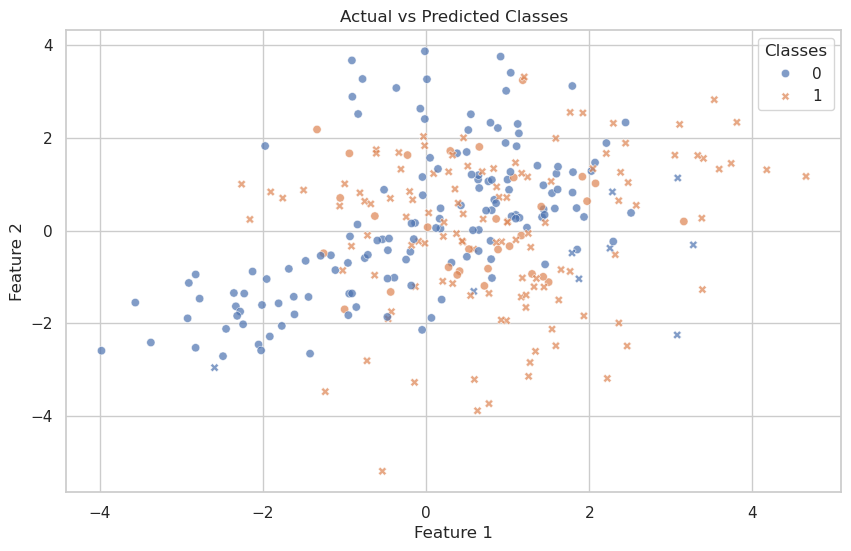

In [22]:
# visualise the actual data vs predicted data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=y_pred_nb, palette='deep', alpha=0.7)
plt.title('Actual vs Predicted Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Classes')
plt.show()